# ***Execute beforehand***
- Intall packages
- Imports
- Use cuda o cpu
- Functions for the images and frames
- Import model VGG-19
- Variables with the coresponding paths (origins and destinations)





In [ ]:
!pip install opencv-python

In [ ]:
# Basic example loading images from the svhn dataset
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.transforms as tf
from torchvision.models import vgg19, VGG19_Weights

import copy

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

In [ ]:
# Para reajustar la imagen
def image_loader_dif(img_path, max_size=400, shape=None):
  image = Image.open(img_path).convert('RGB')

  if max(image.size) > max_size:
    size = max_size
  else:
    size = max(image.size)

  if shape is not None:
    size = shape

  in_transform = tf.Compose([
    tf.Resize((size, int(1.5*size))),
    tf.ToTensor()])

  image = in_transform(image)[:3, :, :].unsqueeze(0)

  return image.to("cuda" if torch.cuda.is_available() else "cpu", torch.float)

In [ ]:
# Para cargar la imagen
def image_loader(image_name):
    image = Image.open(image_name)
    # fake batch dimension required to fit network's input dimensions
    image = loader(image).unsqueeze(0)
    return image.to(device, torch.float)

In [ ]:
# Optimizer
def get_input_optimizer(input_img):
    #optimizer = optim.Adam([input_img], lr=0.01)
    optimizer = optim.LBFGS([input_img])
    return optimizer

In [ ]:
# Per dividir el video en frames
import cv2
import os

def video_to_frames(video_file, output_folder):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Open the video file
    video_capture = cv2.VideoCapture(video_file)

    # Check if the video was opened successfully
    if not video_capture.isOpened():
        print(f"Error: Could not open video {video_file}")
        return

    frame_number = 0
    while True:
        # Read the next frame
        ret, frame = video_capture.read()

        # If the frame was not read successfully, exit the loop
        if not ret:
            break

        # Construct the file name for the current frame
        frame_file = os.path.join(output_folder, f"frame_{frame_number:04d}.jpg")

        # Save the current frame as an image file
        cv2.imwrite(frame_file, frame)

        # Increment the frame number
        frame_number += 1

    # Release the video capture object
    video_capture.release()
    print(f"Extracted {frame_number} frames from {video_file} to {output_folder}")

In [ ]:
# De frames a video de nuevo
import os
import cv2
import torch
from PIL import Image
import torchvision.transforms as transforms

def frames_to_video(frames_folder, output_video_file, fps=30):
    frame_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.jpg')])
    frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(output_video_file, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

    for frame_file in frame_files:
        frame = cv2.imread(os.path.join(frames_folder, frame_file))
        video.write(frame)

    video.release()

In [ ]:
def get_video_info(video_path):
    # Abrir el video
    video_capture = cv2.VideoCapture(video_path)

    # Verificar si el video se abrió correctamente
    if not video_capture.isOpened():
        print(f"Error: No se pudo abrir el video {video_path}")
        return

    # Obtener la tasa de frames por segundo (fps)
    fps = video_capture.get(cv2.CAP_PROP_FPS)

    # Obtener el número total de frames
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))

    # Cerrar el video
    video_capture.release()

    return fps, frame_count

In [ ]:
# Model VGG-19
from torchsummary import summary
cnn = vgg19(weights=VGG19_Weights.DEFAULT).features.eval()

summary(cnn, input_size=(3, 400, 600))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 400, 600]           1,792
              ReLU-2         [-1, 64, 400, 600]               0
            Conv2d-3         [-1, 64, 400, 600]          36,928
              ReLU-4         [-1, 64, 400, 600]               0
         MaxPool2d-5         [-1, 64, 200, 300]               0
            Conv2d-6        [-1, 128, 200, 300]          73,856
              ReLU-7        [-1, 128, 200, 300]               0
            Conv2d-8        [-1, 128, 200, 300]         147,584
              ReLU-9        [-1, 128, 200, 300]               0
        MaxPool2d-10        [-1, 128, 100, 150]               0
           Conv2d-11        [-1, 256, 100, 150]         295,168
             ReLU-12        [-1, 256, 100, 150]               0
           Conv2d-13        [-1, 256, 100, 150]         590,080
             ReLU-14        [-1, 256, 1

In [ ]:
#Folders
# Video 1
original_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Video_for_style_tranfer.mp4'
frames_original_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results'
styled_frames_folder = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_styled_images'

#Video 2
original_video_2 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/break_dance.mp4'
frames_original_video_2 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_2'
styled_frames_folder_2 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_styled_images_2'

#Video 3
original_video_3 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/ballet.mp4'
frames_original_video_3 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_3'
styled_frames_folder_3 = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_styled_images_3'

if not os.path.exists(styled_frames_folder):
    os.makedirs(styled_frames_folder)

if not os.path.exists(styled_frames_folder_2):
    os.makedirs(styled_frames_folder)

if not os.path.exists(styled_frames_folder_3):
    os.makedirs(styled_frames_folder)

# From video to frames:
This divides the vidoes and frames the frames in the corresponfing paths (Only execute once)

In [ ]:
#Video 1
video_to_frames(original_video, frames_original_video)
fps, frame_count = get_video_info(original_video)
print(f"Frames por segundo (FPS): {fps}")
print(f"Número total de frames: {frame_count}")

In [ ]:
#Video 2
video_to_frames(original_video_2, frames_original_video_2)
fps, frame_count = get_video_info(original_video_2)
print(f"Frames por segundo (FPS): {fps}")
print(f"Número total de frames: {frame_count}")

Extracted 176 frames from /content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/break_dance.mp4 to /content/drive/Shareddrives/deep learning/Final project/Transfer style/results_2
Frames por segundo (FPS): 30.0
Número total de frames: 176


In [ ]:
#Video 3
video_to_frames(original_video_3, frames_original_video_3)
fps, frame_count = get_video_info(original_video_3)
print(f"Frames por segundo (FPS): {fps}")
print(f"Número total de frames: {frame_count}")

Extracted 311 frames from /content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/ballet.mp4 to /content/drive/Shareddrives/deep learning/Final project/Transfer style/results_3
Frames por segundo (FPS): 29.97002997002997
Número total de frames: 311



# STYLE AND CONTENT IMAGE: BASE CODE AND TESTS (VGG19,DenseNet121,ResNet50)

In [ ]:
# Desired size of the output image
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no GPU

loader = tf.Compose([
    tf.Resize(imsize),  # scale imported image
    tf.ToTensor()])  # transform it into a torch tensor

style_img = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/calle2.jpg")
content_img = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/calle_content.jpg")

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

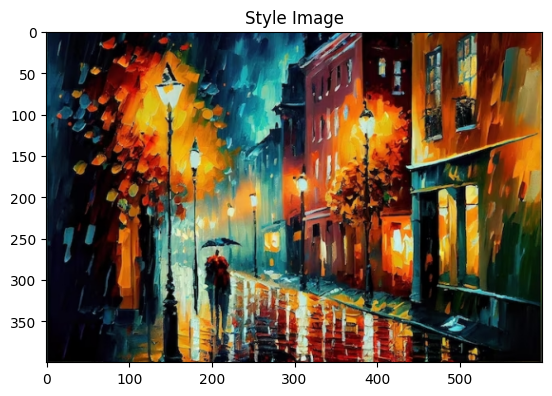

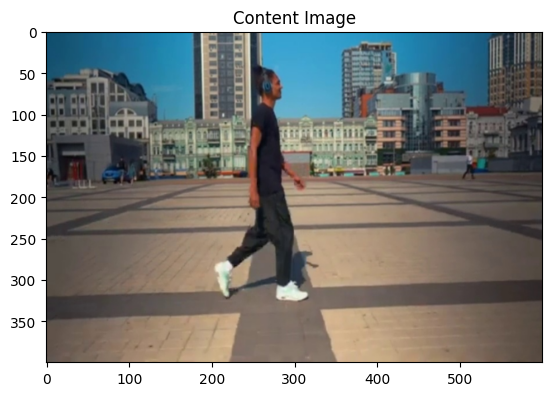

In [ ]:
unloader = tf.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    #image = tensor.cuda().clone()  # we clone the tensor to not do changes on it
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated


plt.figure()
imshow(style_img, title='Style Image')

plt.figure()
imshow(content_img, title='Content Image')

In [ ]:
class ContentLoss(nn.Module):

    def __init__(self, target,):
        super(ContentLoss, self).__init__()
        # we 'detach' the target content from the tree used
        # to dynamically compute the gradient: this is a stated value,
        # not a variable. Otherwise the forward method of the criterion
        # will throw an error.
        self.target = target.detach()

    def forward(self, input):
        self.loss = F.mse_loss(input, self.target)
        return input

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()
    # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resize F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

In [ ]:
class StyleLoss(nn.Module):

    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

In [ ]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406])
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225])

# create a module to normalize input image so we can easily put it in a
# ``nn.Sequential``
class Normalization(nn.Module):
    def __init__(self, mean, std):
        super(Normalization, self).__init__()
        # .view the mean and std to make them [C x 1 x 1] so that they can
        # directly work with image Tensor of shape [B x C x H x W].
        # B is batch size. C is number of channels. H is height and W is width.
        self.mean = torch.tensor(mean).view(-1, 1, 1)
        self.std = torch.tensor(std).view(-1, 1, 1)

    def forward(self, img):
        # normalize ``img``
        return (img - self.mean) / self.std

In [ ]:
# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std)

    # just in order to have an iterable access to or list of content/style
    # losses
    content_losses = []
    style_losses = []

    # assuming that ``cnn`` is a ``nn.Sequential``, so we make a new ``nn.Sequential``
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ``ContentLoss``
            # and ``StyleLoss`` we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

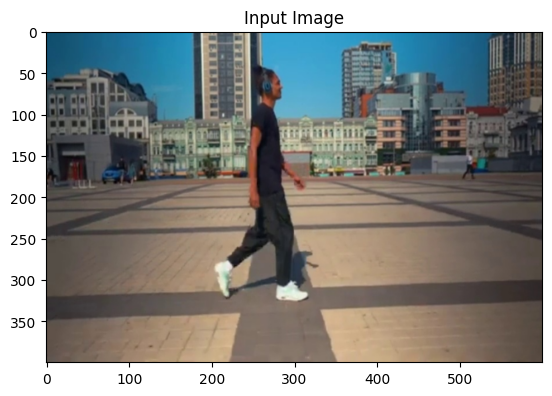

In [ ]:
input_img = content_img.clone()
# if you want to use white noise by using the following code:
#input_img = torch.randn(content_img.data.size())

# Add the original input image to the figure:
plt.figure()
imshow(input_img, title='Input Image')

In [ ]:
def run_style_transfer(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

Building the style transfer model..


/usr/local/lib/python3.10/dist-packages/torch/utils/_device.py:78: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return func(*args, **kwargs)


Optimizing..
run [50]:
Style Loss : 208.433411 Content Loss: 22.335896

run [100]:
Style Loss : 66.516106 Content Loss: 23.597954

run [150]:
Style Loss : 34.256847 Content Loss: 23.583384

run [200]:
Style Loss : 22.629532 Content Loss: 22.740049

run [250]:
Style Loss : 15.899714 Content Loss: 22.051428

run [300]:
Style Loss : 10.017266 Content Loss: 21.294458



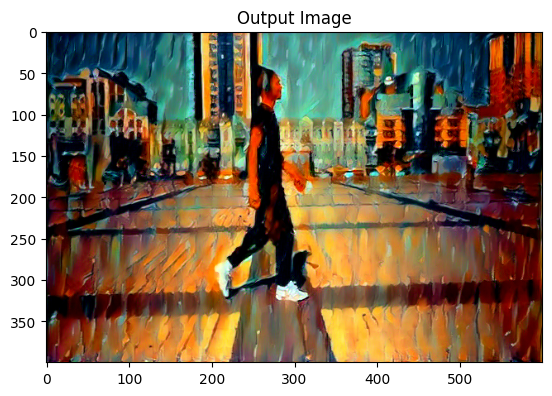

In [ ]:
output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img)

plt.figure()
imshow(output, title='Output Image')

plt.ioff()
plt.show()

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights
resnet = resnet50(weights=ResNet50_Weights.DEFAULT).eval()

from torchvision.models import densenet121, DenseNet121_Weights
densenet = densenet121(weights=DenseNet121_Weights.DEFAULT).features.eval()

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 140MB/s]
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 119MB/s]


UTILIZANDO DENSENET21

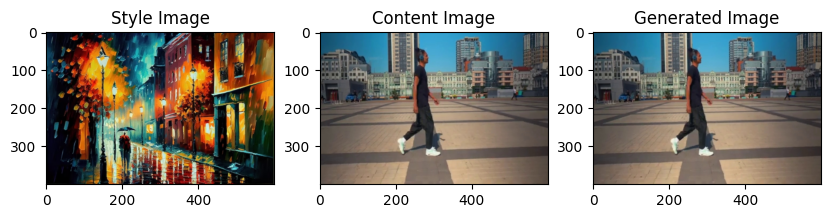

  0%|          | 0/1000 [00:00<?, ?it/s]


Loss at 100 epoch -----> 3352240640.0
Loss at 200 epoch -----> 1205471744.0
Loss at 300 epoch -----> 715860544.0
Loss at 400 epoch -----> 520229728.0
Loss at 500 epoch -----> 384481472.0
Loss at 600 epoch -----> 349455936.0
Loss at 700 epoch -----> 324899648.0
Loss at 800 epoch -----> 308210464.0
Loss at 900 epoch -----> 215422528.0


Loss at 1000 epoch -----> 208398720.0

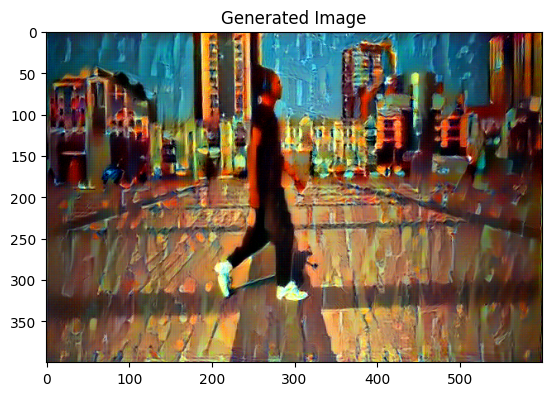

In [ ]:
#importing the required libraries
import torch
import torch.nn as nn

import torchvision.models as models
from torchvision import transforms

from PIL import Image
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
#load the pre-trained model
#getting only the conv network and not linear classification head
model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).features

# selecting the feature layers from the conv layers in the model
# this is choosen manually going through all the layers in the model, we can also experiment with this selection

# for i, layer in enumerate(model):
#   print(i, layer)
#   print('#@' * 100)
class NeuralStyleTransfer(nn.Module):
  def __init__(self):
    super(NeuralStyleTransfer, self).__init__()
    self.model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1).features
    self.c_feature_layers = [8,10]  #experiment with is set of layers you choose for getting the content and style info from the image
    self.s_feature_layers = [4,6]

  def forward(self, x):
    c_features = []
    s_features = []
    for layer_num, layer in enumerate(self.model):
      x = layer(x)
      #getting the selected layer's output from the model as features
      if layer_num in self.c_feature_layers:
        c_features.append(x)
      elif layer_num in self.s_feature_layers:
        s_features.append(x)
    return c_features, s_features

#returns the image as tensor after resizing it into (3,224,224) and normalized between 0 and 1
# style.jpg and content.jpg are the two images used which are in the current working directory

def load_image(path, transform):
  img = Image.open(path)
  return transform(img).to('cuda')

transform = transforms.Compose([transforms.Resize((400,600)),
                                transforms.ToTensor()])

style = load_image("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/calle2.jpg", transform)
content = load_image("/content/drive/Shareddrives/deep learning/Final project/Transfer style/calle_content.jpg", transform)


#using the content image as our start image, this will decrease our model running time
generated = load_image("/content/drive/Shareddrives/deep learning/Final project/Transfer style/calle_content.jpg", transform)
#displaying the loaded images
fig = plt.figure(figsize=(10, 5))

plt.subplot(1,3,1)
plt.imshow(style.permute(1,2,0).cpu()) # (h,w,c)
plt.title('Style Image')

plt.subplot(1,3,2)
plt.imshow(content.permute(1,2,0).cpu()) # (h,w,c)
plt.title('Content Image')

plt.subplot(1,3,3)
plt.imshow(generated.permute(1,2,0).cpu())
plt.title('Generated Image')

plt.show()

# setting the generated images values to be tracked and modified while training
generated.requires_grad_(True)

# densenets weigths need not to be updated
model = NeuralStyleTransfer()
model.to('cuda')
# using the model in eval mode
# so it's weights are not tracked for calculating gradients
model.eval()

step_count = 1000
learning_rate = 0.01###########################################
alpha = 1
beta = 200

#custom loss is defined inside the training loop
#the values in the generated matrix needs to be updated by the optimizer
optimizer = torch.optim.Adam([generated], lr = learning_rate)
#optimizer = torch.optim.LBFGS([generated], lr = 0.7)

#training
for i in tqdm(range(step_count)):
  _,style_features = model(style.unsqueeze(0))
  content_features,_ = model(content.unsqueeze(0))
  c_generated_features, s_generated_features = model(generated.unsqueeze(0))

  #content loss
  content_loss = 0
  for cf, gf in zip(content_features, c_generated_features):
    content_loss += torch.sum((cf-gf)**2)

  #style loss
  style_loss = 0
  for sf, gf in zip(style_features, s_generated_features):
    bs, c, h, w = sf.shape
    s_gram = torch.mm(sf.view(c, h*w), sf.view(c, h*w).T)
    g_gram = torch.mm(gf.view(c, h*w), gf.view(c, h*w).T)
    style_loss += torch.sum((s_gram - g_gram)**2)

  #total_loss
  loss = alpha * content_loss + beta * style_loss

  #update values in the generated image
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (i+1) % 100 == 0:
    print(f"\nLoss at {i+1} epoch -----> {loss.item()}", end='')

#display the generated image
plt.imshow(generated.permute(1,2,0).cpu().detach().numpy())
plt.title('Generated Image')
plt.show()

UTILZANDO RESNET50


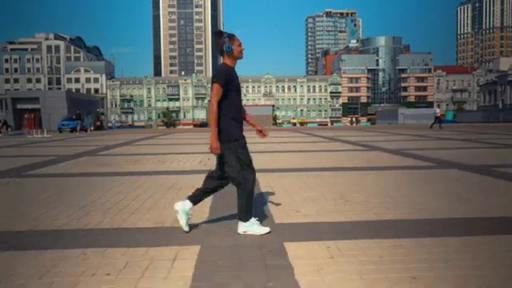

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = False

import numpy as np
from PIL import Image
import time
import tensorflow as tf
import IPython.display

from tensorflow.keras.preprocessing import image as kp_image
from tensorflow.keras import models, layers

print("Eager execution: {}".format(tf.executing_eagerly()))

content_path = "/content/drive/Shareddrives/deep learning/Final project/Transfer style/calle_content.jpg"
style_path = "/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/calle2.jpg"

def load_img(path_to_img):
    max_dim = 512
    img = Image.open(path_to_img)
    long = max(img.size)
    scale = max_dim / long
    img = img.resize((round(img.size[0] * scale), round(img.size[1] * scale)), Image.ANTIALIAS)

    img = kp_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

def imshow(img, title=None):
    out = np.squeeze(img, axis=0)
    out = out.astype('uint8')
    plt.imshow(out)
    if title is not None:
        plt.title(title)
    plt.imshow(out)

plt.figure(figsize=(10, 10))

content = load_img(content_path).astype('uint8')
style = load_img(style_path).astype('uint8')

plt.subplot(1, 2, 1)
imshow(content, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style, 'Style Image')
plt.show()

def load_and_process_img(path_to_img):
    img = load_img(path_to_img)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    return img

def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, "Input to deprocess image must be an image of dimension [1, height, width, channel] or [height, width, channel]"
    if len(x.shape) != 3:
        raise ValueError("Invalid input to deprocessing image")

    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

# Content layer where will pull our feature maps
content_layers = ['conv1_conv']

# Style layer we are interested in
style_layers = ['conv2_block3_out', 'conv3_block4_out', 'conv4_block6_out', 'conv5_block3_out']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

def get_model():
    resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet')
    resnet.trainable = False
    style_outputs = [resnet.get_layer(name).output for name in style_layers]
    content_outputs = [resnet.get_layer(name).output for name in content_layers]
    model_outputs = style_outputs + content_outputs
    return models.Model(resnet.input, model_outputs)

def get_content_loss(base_content, target):
    return tf.reduce_mean(tf.square(base_content - target))

def gram_matrix(input_tensor):
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

def get_style_loss(base_style, gram_target):
    height, width, channels = base_style.get_shape().as_list()
    gram_style = gram_matrix(base_style)
    return tf.reduce_mean(tf.square(gram_style - gram_target))

def get_feature_representations(model, content_path, style_path):
    content_image = load_and_process_img(content_path)
    style_image = load_and_process_img(style_path)
    style_outputs = model(style_image)
    content_outputs = model(content_image)
    style_features = [style_layer[0] for style_layer in style_outputs[:num_style_layers]]
    content_features = [content_layer[0] for content_layer in content_outputs[num_content_layers:]]
    return style_features, content_features

def compute_loss(model, loss_weights, init_image, gram_style_features, content_features):
    style_weight, content_weight = loss_weights
    model_outputs = model(init_image)
    style_output_features = model_outputs[:num_style_layers]
    content_output_features = model_outputs[num_content_layers:]
    style_score = 0
    content_score = 0
    weight_per_style_layer = 1.0 / float(num_style_layers)
    for target_style, comb_style in zip(gram_style_features, style_output_features):
        style_score += weight_per_style_layer * get_style_loss(comb_style[0], target_style)
    weight_per_content_layer = 1.0 / float(num_content_layers)
    for target_content, comb_content in zip(content_features, content_output_features):
        content_score += weight_per_content_layer * get_content_loss(comb_content[0], target_content)
    style_score *= style_weight
    content_score *= content_weight
    loss = style_score + content_score
    return loss, style_score, content_score

def compute_grads(cfg):
    with tf.GradientTape() as tape:
        all_loss = compute_loss(**cfg)
    total_loss = all_loss[0]
    return tape.gradient(total_loss, cfg['init_image']), all_loss

def run_style_transfer(content_path, style_path, num_iterations=1000, content_weight=1e3, style_weight=1e-2):
    model = get_model()
    for layer in model.layers:
        layer.trainable = False
    style_features, content_features = get_feature_representations(model, content_path, style_path)
    gram_style_features = [gram_matrix(style_feature) for style_feature in style_features]
    init_image = load_and_process_img(content_path)
    init_image = tf.Variable(init_image, dtype=tf.float32)
    opt = tf.keras.optimizers.Adam(learning_rate=5.0)##################################################################################
    best_loss, best_img = float('inf'), None
    loss_weights = (style_weight, content_weight)
    cfg = {
        'model': model,
        'loss_weights': loss_weights,
        'init_image': init_image,
        'gram_style_features': gram_style_features,
        'content_features': content_features
    }
    num_rows = 2
    num_cols = 5
    display_interval = num_iterations // (num_rows * num_cols)
    global_start = time.time()
    norm_means = np.array([103.939, 116.779, 123.68])
    min_vals = -norm_means
    max_vals = 255 - norm_means
    imgs = []
    for i in range(num_iterations):
        grads, all_loss = compute_grads(cfg)
        loss, style_score, content_score = all_loss
        opt.apply_gradients([(grads, init_image)])
        clipped = tf.clip_by_value(init_image, min_vals, max_vals)
        init_image.assign(clipped)
        if loss < best_loss:
            best_loss = loss
            best_img = deprocess_img(init_image.numpy())
        if i % display_interval == 0:
            plot_img = init_image.numpy()
            plot_img = deprocess_img(plot_img)
            imgs.append(plot_img)
            IPython.display.clear_output(wait=True)
            IPython.display.display_png(Image.fromarray(plot_img))
            print('Iteration: {}'.format(i))
            print('Total loss: {:.4e}, style loss: {:.4e}, content loss: {:.4e}'.format(loss, style_score, content_score))
    print('Total time: {:.4f}s'.format(time.time() - global_start))
    IPython.display.clear_output(wait=True)
    plt.figure(figsize=(14, 4))
    for i, img in enumerate(imgs):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    return best_img, best_loss

best, best_loss = run_style_transfer(content_path, style_path, num_iterations=1000)
Image.fromarray(best)


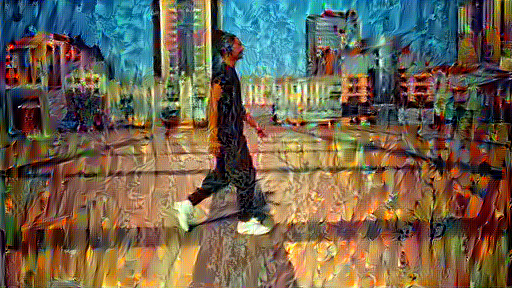

In [ ]:
best, best_loss = run_style_transfer(content_path, style_path, num_iterations=300, content_weight=0.5, style_weight=1e7)
Image.fromarray(best)

# First improvements on the implementation

Changes:
- Every time it did a MaxPool, we changed it so it does an AVGPool
- Style_wights: We incremented the weight in the fisrt layer, but it got worse so we kept it as it was
- Content: We changed to 1e6
- Style weight: We changed to 1


In [ ]:
class StyleLoss_improved(nn.Module):
    def __init__(self, target_feature, weight):
        super(StyleLoss_improved, self).__init__()
        self.target = gram_matrix(target_feature).detach()
        self.weight = weight
        self.loss = torch.tensor(0.0)  # Inicializar self.loss como un tensor de cero

    def forward(self, input):
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target) * self.weight
        return input

In [ ]:
style_weights = {'conv_1': 0.75,
                 'conv_2': 0.5,
                 'conv_3': 0.2,
                 'conv_4': 0.2,
                 'conv_5': 0.2}

content_weight = 1e6
style_weight = 1

In [ ]:
# Desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses_improved(cnn, normalization_mean, normalization_std,
                               style_img, content_img,
                               content_layers=content_layers_default,
                               style_layers=style_layers_default,
                               style_weights=style_weights,
                               content_weight=content_weight,
                               style_weight=style_weight):
    # normalization module
    normalization = Normalization(normalization_mean, normalization_std)

    # just in order to have an iterable access to or list of content/style
    # losses
    content_losses = []
    style_losses = []

    # assuming that ``cnn`` is a ``nn.Sequential``, so we make a new ``nn.Sequential``
    # to put in modules that are supposed to be activated sequentially
    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            # The in-place version doesn't play very nicely with the ``ContentLoss``
            # and ``StyleLoss`` we insert below. So we replace with out-of-place
            # ones here.
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            # Replace MaxPool2d with AvgPool2d
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)

        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            # add content loss:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            # add style loss:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            #style_loss = StyleLoss_improved(target_feature, style_weights[name])  # Usar el peso correspondiente
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses

In [ ]:
def run_style_transfer_improved(cnn, normalization_mean, normalization_std,
                       content_img, style_img, input_img, num_steps=300,
                       style_weight=1000000, content_weight=1):
    """Run the style transfer."""
    print('Building the style transfer model..')
    model, style_losses, content_losses = get_style_model_and_losses_improved(cnn,
        normalization_mean, normalization_std, style_img, content_img)

    # We want to optimize the input and not the model parameters so we
    # update all the requires_grad fields accordingly
    input_img.requires_grad_(True)
    # We also put the model in evaluation mode, so that specific layers
    # such as dropout or batch normalization layers behave correctly.
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            # correct the values of updated input image
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            loss.backward()

            if style_score.item() > 50000 or content_score.item() > 50000:
                run[0] -= 1
            else:
                run[0] += 1

            if run[0] % 50 == 0:
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return style_score + content_score

        optimizer.step(closure)

    # a last correction...
    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

In [ ]:
unloader = tf.ToPILImage()  # reconvert into PIL image

plt.ion()

def imshow(tensor, title=None):
    #image = tensor.cuda().clone()  # we clone the tensor to not do changes on it
    image = tensor.cpu().clone()  # we clone the tensor to not do changes on it
    image = image.squeeze(0)      # remove the fake batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated

In [ ]:
def gram_matrix(input):
    a, b, c, d = input.size()
    # a=batch size(=1)
    # b=number of feature maps
    # (c,d)=dimensions of a f. map (N=c*d)

    features = input.view(a * b, c * d)  # resize F_XL into \hat F_XL

    G = torch.mm(features, features.t())  # compute the gram product

    # we 'normalize' the values of the gram matrix
    # by dividing by the number of element in each feature maps.
    return G.div(a * b * c * d)

Building the style transfer model..
Optimizing..
run [0]:
Style Loss : 6739.596680 Content Loss: 24.836754

run [50]:
Style Loss : 44.462605 Content Loss: 22.823662

run [100]:
Style Loss : 15.353884 Content Loss: 19.428843

run [150]:
Style Loss : 6.168002 Content Loss: 16.319838

run [200]:
Style Loss : 2.215559 Content Loss: 14.329727

run [250]:
Style Loss : 1.324797 Content Loss: 12.881217

run [300]:
Style Loss : 0.993291 Content Loss: 12.159758



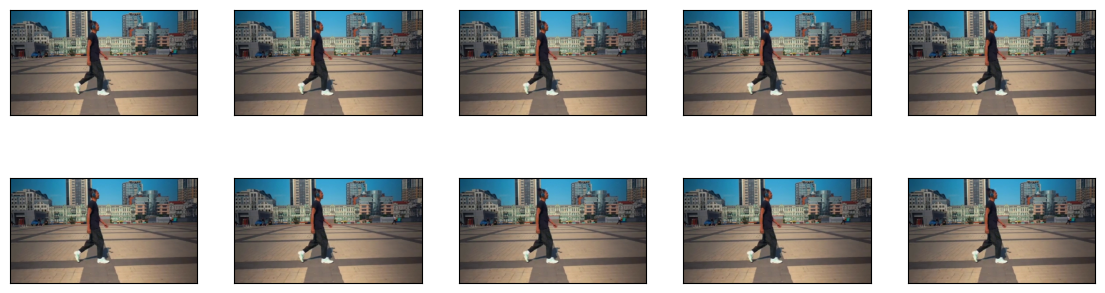

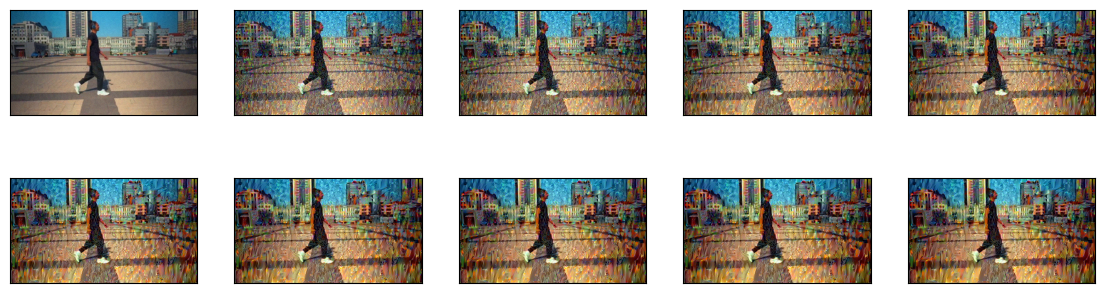

<Figure size 1000x1000 with 0 Axes>

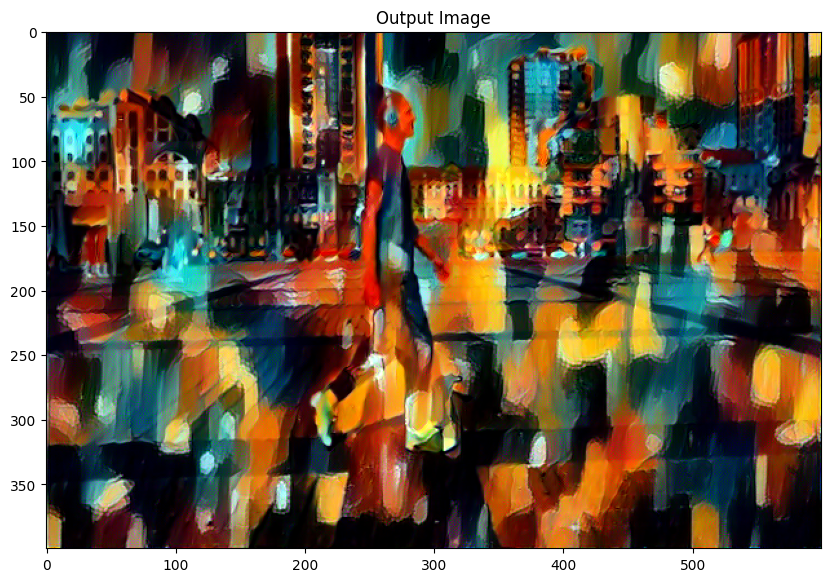

In [ ]:
#Random noise or not
input_img1 = torch.randn(content_img.data.size())
#input_img1 =  content_img.clone()
output = run_style_transfer_improved(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img1, num_steps = 300)

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

# New loss and weight implementation
We include a new loss and weight that takes into account the previous frame so at the end the video is cohorent.

In [ ]:
class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        # Asegurar que input tiene la forma correcta
        if input.dim() < 4:
            input = input.unsqueeze(0)  # Añadir dimensión del batch si es necesario

        # Calcular la matriz Gram
        G = gram_matrix(input)

        # Calcular la pérdida
        self.loss = F.mse_loss(G, self.target)

        return input

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as tf
from PIL import Image

class TemporalLoss(nn.Module):
    def __init__(self, previous_frame, alpha=1.0):
        super(TemporalLoss, self).__init__()
        self.previous_frame = nn.functional.interpolate(previous_frame, size=(previous_frame.shape[-2], previous_frame.shape[-1]), mode='bilinear', align_corners=False)
        self.alpha = alpha
        self.loss = 0

    def forward(self, current_frame):
        current_frame_resized = nn.functional.interpolate(current_frame, size=(self.previous_frame.shape[-2], self.previous_frame.shape[-1]), mode='bilinear', align_corners=False)
        self.loss = self.alpha * F.mse_loss(current_frame_resized, self.previous_frame)
        return current_frame

In [ ]:
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

def get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std,
                                        style_img, content_img, previous_frame=None,
                                        content_layers=content_layers_default,
                                        style_layers=style_layers_default,
                                        style_weights=None,
                                        content_weight=1,
                                        style_weight=1000000,
                                        temporal_weight=100):
    normalization = Normalization(normalization_mean, normalization_std).to('cuda')

    content_losses = []
    style_losses = []
    temporal_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    if previous_frame is not None:
        previous_frame = previous_frame.to('cuda')
        target_temporal = model(previous_frame).detach()
        temporal_loss = TemporalLoss(target_temporal, alpha=temporal_weight)
        model.add_module("temporal_loss", temporal_loss)
        temporal_losses.append(temporal_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss) or isinstance(model[i], TemporalLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses, temporal_losses


In [ ]:
def run_style_transfer_improved_temp(cnn, normalization_mean, normalization_std,
                                content_img, style_img, input_img, previous_img=None, num_steps=300,
                                style_weight=1000000, content_weight=1, temporal_weight=100):
    print('Building the style transfer model..')
    model, style_losses, content_losses, temporal_losses = get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std,
                                                                                                    style_img, content_img, previous_frame=previous_img)

    input_img.requires_grad_(True)
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            temporal_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            for tl in temporal_losses:
                temporal_score += tl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            if temporal_losses:
                loss += temporal_score

            loss.backward()

            # We add 1 more epoch every time the error loss is bigger than 200
            if style_score.item() > 200 or content_score.item() > 200:
                run[0] -= 1
            else:
                run[0] += 1

            # Print every 50 epochs
            if run[0] % 50 == 0:
                print(f"run {run[0]}:")
                if temporal_losses:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f} Temporal Loss: {temporal_score.item():4f}')
                else:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f}')
                print()

            return loss

        optimizer.step(closure)

    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img


In [ ]:
#Random noise or not
input_img1 = torch.randn(content_img.data.size()).to('cuda')
#input_img1 =  content_img.clone()

output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                         content_img, style_img, input_img1, previous_img=None, num_steps=300, style_weight=1e5, content_weight=1, temporal_weight=500 )

plt.figure()
imshow(output, title='Output Image')

# sphinx_gallery_thumbnail_number = 4
plt.ioff()
plt.show()

In [ ]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms

def apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=None):
    content_image = image_loader_dif(frame_path).to('cuda')

    #input_img = torch.randn(input_img.data.size()).to('cuda')
    input_img = content_img.clone().to('cuda')

    temporal_weight = 500 if previous_img is not None else 0  # No temporal loss for the first frame

    output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                              content_image, style_img, input_img, previous_img=previous_img, num_steps=200,
                                              style_weight=1e5, content_weight=1, temporal_weight=temporal_weight)

    output = output.cpu().clone()
    output = output.squeeze(0)
    output_image = transforms.ToPILImage()(output)
    output_image.save(styled_frame_path)

    return output

frames_folder = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results'
styled_frames_folder = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/results_styled_images'

if not os.path.exists(styled_frames_folder):
    os.makedirs(styled_frames_folder)

frame_files = sorted([f for f in os.listdir(frames_folder) if f.endswith('.jpg')])

previous_styled_frame = None
for frame_file in frame_files:
    frame_path = os.path.join(frames_folder, frame_file)
    styled_frame_path = os.path.join(styled_frames_folder, frame_file)
    previous_styled_frame = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=previous_styled_frame)


# **Best video transfer style implementation**
Works pretty well using:
- Optimizator: Adam
- lr = 0.03
- Epochs: 300
- Style weight: 1e7
- Content weight: 0.005
- Temporal weight: 500

Note: using L-BFGS with 200 epochs (style_w = 1e5, content_w = 1, temp_w =500) sometime the loss value of the style goes so high that nans appear (just noise)

In [ ]:
style_weights = {'conv_1': 0.75,
                 'conv_2': 0.5,
                 'conv_3': 0.5,
                 'conv_4': 0.5,
                 'conv_5': 0.2}

content_weight = 1e7
style_weight = 1e2

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as tf
from PIL import Image

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    #optimizer = optim.Adam([input_img], lr=0.03)   #CON LB LR =0.7 Y PESO STY.1E7
    optimizer = optim.LBFGS([input_img], lr=0.7)
    return optimizer

class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        if input.dim() < 4:
            input = input.unsqueeze(0)  # Añadir dimensión del batch si es necesario
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

class TemporalLoss(nn.Module):
    def __init__(self, previous_frames, alpha=1.0):
        super(TemporalLoss, self).__init__()
        self.previous_frames = nn.functional.interpolate(previous_frames, size=(previous_frames.shape[-2], previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.alpha = alpha
        self.loss = 0

    def forward(self, current_frame):
        current_frame_resized = nn.functional.interpolate(current_frame, size=(self.previous_frames.shape[-2], self.previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.loss = self.alpha * F.mse_loss(current_frame_resized, self.previous_frames)
        return current_frame

def get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=None, content_layers=content_layers_default, style_layers=style_layers_default, style_weights=None, content_weight=1, style_weight=1000000, temporal_weight=100):
    normalization = Normalization(normalization_mean, normalization_std).to('cuda')

    content_losses = []
    style_losses = []
    temporal_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    if previous_frame is not None:
        previous_frame = previous_frame.to('cuda')
        target_temporal = model(previous_frame).detach()
        temporal_loss = TemporalLoss(target_temporal, alpha=temporal_weight)
        model.add_module("temporal_loss", temporal_loss)
        temporal_losses.append(temporal_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss) or isinstance(model[i], TemporalLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses, temporal_losses

def run_style_transfer_improved_temp(cnn, normalization_mean, normalization_std, content_img, style_img, input_img, previous_img=None, num_steps=300, style_weight=1000000, content_weight=1, temporal_weight=100):
    print('Building the style transfer model..')
    model, style_losses, content_losses, temporal_losses = get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=previous_img)

    input_img.requires_grad_(True)
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            temporal_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            for tl in temporal_losses:
                temporal_score += tl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            if temporal_losses:
                loss += temporal_score

            if torch.isnan(loss):
                raise ValueError("Loss is NaN, stopping training.")

            loss.backward()

            # Clipping gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            if style_score.item() > 20000 or content_score.item() > 20000:
                run[0] -= 1
            else:
                run[0] += 1

            if run[0] % 50 == 0:
                print(f"run {run[0]}:")
                if temporal_losses:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f} Temporal Loss: {temporal_score.item():4f}')
                else:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f}')
                print()

            return loss

        optimizer.step(closure)

    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

def apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=None):
    content_image = image_loader_dif(frame_path).to('cuda')
    input_img = content_image.clone().to('cuda')

    temporal_weight = 500 if previous_img is not None else 0  # No temporal loss for the first frame

    output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                              content_image, style_img, input_img, previous_img=previous_img, num_steps=300,
                                              style_weight=1e7, content_weight=0.005, temporal_weight=temporal_weight) #ETSAB 1E7 Y 0.005

    output = output.cpu().clone()
    output = output.squeeze(0)
    output_image = transforms.ToPILImage()(output)
    output_image.save(styled_frame_path)

    return output

frame_files = sorted([f for f in os.listdir(frames_original_video) if f.endswith('.jpg')])

previous_styled_frame = None
for frame_file in frame_files:
    frame_path = os.path.join(frames_original_video, frame_file)
    styled_frame_path = os.path.join(styled_frames_folder, frame_file)
    previous_styled_frame = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=previous_styled_frame)
    print(f'Frame: {frame_file}')

In [ ]:
# Transforma los nuevos frames modificados a video
new_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/final_transformed_video/final_video_temp_loss_4.mp4'
frames_to_video(styled_frames_folder , new_video)

# Multi-Style Video Image Implementation: First Video




In [ ]:
style_weights = {'conv_1': 0.75,
                 'conv_2': 0.5,
                 'conv_3': 0.2,
                 'conv_4': 0.2,
                 'conv_5': 0.2}

content_weight = 1e7
style_weight = 1e2

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as tf
from PIL import Image
from collections import deque
import os

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    #optimizer = optim.Adam([input_img], lr=0.03)
    optimizer = optim.LBFGS([input_img], lr = 0.7)
    return optimizer

class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        if input.dim() < 4:
            input = input.unsqueeze(0)  # Añadir dimensión del batch si es necesario
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

class TemporalLoss(nn.Module):
    def __init__(self, previous_frames, alpha=1.0):
        super(TemporalLoss, self).__init__()
        self.previous_frames = nn.functional.interpolate(previous_frames, size=(previous_frames.shape[-2], previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.alpha = alpha
        self.loss = 0

    def forward(self, current_frame):
        current_frame_resized = nn.functional.interpolate(current_frame, size=(self.previous_frames.shape[-2], self.previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.loss = self.alpha * F.mse_loss(current_frame_resized, self.previous_frames)
        return current_frame

def blend_styles(style1, style2, alpha):
    blended_style = alpha * style1 + (1 - alpha) * style2
    return blended_style

def get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=None, content_layers=content_layers_default, style_layers=style_layers_default, style_weights=None, content_weight=1, style_weight=1000000, temporal_weight=100):
    normalization = Normalization(normalization_mean, normalization_std).to("cuda" if torch.cuda.is_available() else "cpu")

    content_losses = []
    style_losses = []
    temporal_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    if previous_frame is not None:
        previous_frame = previous_frame.to("cuda" if torch.cuda.is_available() else "cpu")
        target_temporal = model(previous_frame).detach()
        temporal_loss = TemporalLoss(target_temporal, alpha=temporal_weight)
        model.add_module("temporal_loss", temporal_loss)
        temporal_losses.append(temporal_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss) or isinstance(model[i], TemporalLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses, temporal_losses

def run_style_transfer_improved_temp(cnn, normalization_mean, normalization_std, content_img, style_img, input_img, previous_img=None, num_steps=300, style_weight=1000000, content_weight=1, temporal_weight=100):
    print('Building the style transfer model..')
    model, style_losses, content_losses, temporal_losses = get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=previous_img)

    input_img.requires_grad_(True)
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            temporal_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            for tl in temporal_losses:
                temporal_score += tl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            if temporal_losses:
                loss += temporal_score

            if torch.isnan(loss):
                raise ValueError("Loss is NaN, stopping training.")

            loss.backward()

            # Clipping gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            if style_score.item() > 20000 or content_score.item() > 20000:
                run[0] -= 1
            else:
                run[0] += 1

            if run[0] % 50 == 0:
                print(f"run {run[0]}:")
                if temporal_losses:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f} Temporal Loss: {temporal_score.item():4f}')
                else:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f}')
                print()

            return loss

        optimizer.step(closure)

    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

def apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=None):
    content_image = image_loader_dif(frame_path).to("cuda" if torch.cuda.is_available() else "cpu")
    input_img = content_image.clone().to("cuda" if torch.cuda.is_available() else "cpu")

    temporal_weight = 500 if previous_img is not None else 0  # No temporal loss for the first frame

    output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                              content_image, style_img, input_img, previous_img=previous_img, num_steps=300,
                                              style_weight=1e7, content_weight=0.005, temporal_weight=temporal_weight)

    output = output.cpu().clone()
    output = output.squeeze(0)
    output_image = transforms.ToPILImage()(output)
    output_image.save(styled_frame_path)

    return output

def apply_styles_to_frames(frame_folder, styled_frame_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles, fps=10, transition_duration=5):
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.jpg') or f.endswith('.png')])
    num_styles = len(styles)
    previous_imgs = deque(maxlen=5)

    for i, frame_file in enumerate(frame_files):
        frame_index = i % (fps * num_styles)
        style_index = frame_index // fps
        next_style_index = (style_index + 1) % num_styles
        frame_in_segment = frame_index % fps

        alpha = min(1, max(0, (frame_in_segment - (fps - transition_duration)) / transition_duration))
        style_img = blend_styles(styles[style_index], styles[next_style_index], alpha)

        frame_path = os.path.join(frame_folder, frame_file)
        styled_frame_path = os.path.join(styled_frame_folder, frame_file)

        previous_img = previous_imgs[-1] if previous_imgs else None

        output = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img)
        previous_imgs.append(output)

        print(f'Applied blended style {style_index}-{next_style_index} to frame {frame_file} with alpha {alpha}')

# Los diferentes estilos
style_img1 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/calle.jpg")
style_img2 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/picasso.jpg")
style_img3 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/starrynight.jpg")

styles = [style_img1, style_img2, style_img3]
apply_styles_to_frames(frames_original_video, styled_frames_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles)

In [ ]:
import os
from collections import deque

def blend_styles(style1, style2, alpha):
    return (1 - alpha) * style1 + alpha * style2

def apply_styles_to_frames(frame_folder, styled_frame_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles, fps=15, frames_per_style_segment=25, transition_duration=12):
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.jpg') or f.endswith('.png')])
    total_frames = len(frame_files)
    num_styles = len(styles)

    frames_per_style_with_transition = frames_per_style_segment + transition_duration
    total_frames_per_cycle = num_styles * frames_per_style_with_transition

    previous_imgs = deque(maxlen=5)

    for i, frame_file in enumerate(frame_files):
        frame_path = os.path.join(frame_folder, frame_file)
        styled_frame_path = os.path.join(styled_frame_folder, frame_file)

        cycle_frame_index = i % total_frames_per_cycle
        style_index = cycle_frame_index // frames_per_style_with_transition
        frame_in_style = cycle_frame_index % frames_per_style_with_transition

        if frame_in_style < frames_per_style_segment:
            # Usar el estilo actual sin interpolación
            style_img = styles[style_index]
            alpha = 0.0
            next_style_index = style_index
        else:
            # Interpolación entre el estilo actual y el siguiente
            frame_in_transition = frame_in_style - frames_per_style_segment
            alpha = frame_in_transition / transition_duration
            next_style_index = (style_index + 1) % num_styles
            style_img = blend_styles(styles[style_index], styles[next_style_index], alpha)

        previous_img = previous_imgs[-1] if previous_imgs else None

        output = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img)
        previous_imgs.append(output)

        print(f'Applied blended style {style_index}-{next_style_index} to frame {frame_file} with alpha {alpha}')


# Los diferentes estilos
style_img1 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/calle.jpg")
style_img2 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/picasso.jpg")
style_img3 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/starrynight.jpg")

styles = [style_img1, style_img2, style_img3]
apply_styles_to_frames(frames_original_video, styled_frames_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles)

In [ ]:
# Transforma los nuevos frames modificados a video
new_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/final_transformed_video/final_video_multistyle_25fps.mp4'
frames_to_video(styled_frames_folder , new_video, fps=25)

# Multi-Style Video Image Implementation: Second Video


In [ ]:
style_weights = {'conv_1': 0.75,
                 'conv_2': 0.5,
                 'conv_3': 0.2,
                 'conv_4': 0.2,
                 'conv_5': 0.2}

content_weight = 1e7
style_weight = 1e2

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as tf
from PIL import Image
from collections import deque
import os

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    #optimizer = optim.Adam([input_img], lr=0.03)
    optimizer = optim.LBFGS([input_img], lr = 0.7)
    return optimizer

class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        if input.dim() < 4:
            input = input.unsqueeze(0)  # Añadir dimensión del batch si es necesario
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

class TemporalLoss(nn.Module):
    def __init__(self, previous_frames, alpha=1.0):
        super(TemporalLoss, self).__init__()
        self.previous_frames = nn.functional.interpolate(previous_frames, size=(previous_frames.shape[-2], previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.alpha = alpha
        self.loss = 0

    def forward(self, current_frame):
        current_frame_resized = nn.functional.interpolate(current_frame, size=(self.previous_frames.shape[-2], self.previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.loss = self.alpha * F.mse_loss(current_frame_resized, self.previous_frames)
        return current_frame

def blend_styles(style1, style2, alpha):
    return (1 - alpha) * style1 + alpha * style2

def get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=None, content_layers=content_layers_default, style_layers=style_layers_default, style_weights=None, content_weight=1, style_weight=1000000, temporal_weight=100):
    normalization = Normalization(normalization_mean, normalization_std).to("cuda" if torch.cuda.is_available() else "cpu")

    content_losses = []
    style_losses = []
    temporal_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    if previous_frame is not None:
        previous_frame = previous_frame.to("cuda" if torch.cuda.is_available() else "cpu")
        target_temporal = model(previous_frame).detach()
        temporal_loss = TemporalLoss(target_temporal, alpha=temporal_weight)
        model.add_module("temporal_loss", temporal_loss)
        temporal_losses.append(temporal_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss) or isinstance(model[i], TemporalLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses, temporal_losses

def run_style_transfer_improved_temp(cnn, normalization_mean, normalization_std, content_img, style_img, input_img, previous_img=None, num_steps=300, style_weight=1000000, content_weight=1, temporal_weight=100):
    print('Building the style transfer model..')
    model, style_losses, content_losses, temporal_losses = get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=previous_img)

    input_img.requires_grad_(True)
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            temporal_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            for tl in temporal_losses:
                temporal_score += tl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            if temporal_losses:
                loss += temporal_score

            if torch.isnan(loss):
                raise ValueError("Loss is NaN, stopping training.")

            loss.backward()

            # Clipping gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            if style_score.item() > 20000 or content_score.item() > 20000:
                run[0] -= 1
            else:
                run[0] += 1

            if run[0] % 50 == 0:
                print(f"run {run[0]}:")
                if temporal_losses:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f} Temporal Loss: {temporal_score.item():4f}')
                else:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f}')
                print()

            return loss

        optimizer.step(closure)

    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

def apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=None):
    content_image = image_loader_dif(frame_path).to("cuda" if torch.cuda.is_available() else "cpu")
    input_img = content_image.clone().to("cuda" if torch.cuda.is_available() else "cpu")

    temporal_weight = 500 if previous_img is not None else 0  # No temporal loss for the first frame

    output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                              content_image, style_img, input_img, previous_img=previous_img, num_steps=300,
                                              style_weight=1e7, content_weight=0.005, temporal_weight=temporal_weight)

    output = output.cpu().clone()
    output = output.squeeze(0)
    output_image = transforms.ToPILImage()(output)
    output_image.save(styled_frame_path)

    return output

def apply_styles_to_frames(frame_folder, styled_frame_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles, fps=15, frames_per_style_segment=25, transition_duration=12):
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.jpg') or f.endswith('.png')])
    total_frames = len(frame_files)
    num_styles = len(styles)

    frames_per_style_with_transition = frames_per_style_segment + transition_duration
    total_frames_per_cycle = num_styles * frames_per_style_with_transition

    previous_imgs = deque(maxlen=5)

    for i, frame_file in enumerate(frame_files):
        frame_path = os.path.join(frame_folder, frame_file)
        styled_frame_path = os.path.join(styled_frame_folder, frame_file)

        cycle_frame_index = i % total_frames_per_cycle
        style_index = cycle_frame_index // frames_per_style_with_transition
        frame_in_style = cycle_frame_index % frames_per_style_with_transition

        if frame_in_style < frames_per_style_segment:
            # Usar el estilo actual sin interpolación
            style_img = styles[style_index]
            alpha = 0.0
            next_style_index = style_index
        else:
            # Interpolación entre el estilo actual y el siguiente
            frame_in_transition = frame_in_style - frames_per_style_segment
            alpha = frame_in_transition / transition_duration
            next_style_index = (style_index + 1) % num_styles
            style_img = blend_styles(styles[style_index], styles[next_style_index], alpha)

        previous_img = previous_imgs[-1] if previous_imgs else None

        output = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img)
        previous_imgs.append(output)

        print(f'Applied blended style {style_index}-{next_style_index} to frame {frame_file} with alpha {alpha}')


# Los diferentes estilos
style_img1 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/desert_painting.jpg")
style_img2 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/bird_fenix_painting.jpg")
style_img3 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/galaxy_painting.jpg")

styles = [style_img1, style_img2, style_img3]
apply_styles_to_frames(frames_original_video_2, styled_frames_folder_2, cnn, cnn_normalization_mean, cnn_normalization_std, styles)

In [ ]:
# Transforma los nuevos frames modificados a video
new_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/final_transformed_video/final_video_2_multistyle_25fps.mp4'
frames_to_video(styled_frames_folder_2, new_video, fps=25)

# Multi-Style Video Image Implementation: Third Video

In [ ]:
style_weights = {'conv_1': 0.75,
                 'conv_2': 0.5,
                 'conv_3': 0.2,
                 'conv_4': 0.2,
                 'conv_5': 0.2}

content_weight = 1e7
style_weight = 1e2

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torchvision.transforms as tf
from PIL import Image
from collections import deque
import os

def get_input_optimizer(input_img):
    # this line to show that input is a parameter that requires a gradient
    #optimizer = optim.Adam([input_img], lr=0.03)
    optimizer = optim.LBFGS([input_img], lr = 0.7)
    return optimizer

class StyleLoss(nn.Module):
    def __init__(self, target_feature):
        super(StyleLoss, self).__init__()
        self.target = gram_matrix(target_feature).detach()

    def forward(self, input):
        if input.dim() < 4:
            input = input.unsqueeze(0)  # Añadir dimensión del batch si es necesario
        G = gram_matrix(input)
        self.loss = F.mse_loss(G, self.target)
        return input

class TemporalLoss(nn.Module):
    def __init__(self, previous_frames, alpha=1.0):
        super(TemporalLoss, self).__init__()
        self.previous_frames = nn.functional.interpolate(previous_frames, size=(previous_frames.shape[-2], previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.alpha = alpha
        self.loss = 0

    def forward(self, current_frame):
        current_frame_resized = nn.functional.interpolate(current_frame, size=(self.previous_frames.shape[-2], self.previous_frames.shape[-1]), mode='bilinear', align_corners=False)
        self.loss = self.alpha * F.mse_loss(current_frame_resized, self.previous_frames)
        return current_frame

def blend_styles(style1, style2, alpha):
    return (1 - alpha) * style1 + alpha * style2

def get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=None, content_layers=content_layers_default, style_layers=style_layers_default, style_weights=None, content_weight=1, style_weight=1000000, temporal_weight=100):
    normalization = Normalization(normalization_mean, normalization_std).to("cuda" if torch.cuda.is_available() else "cpu")

    content_losses = []
    style_losses = []
    temporal_losses = []

    model = nn.Sequential(normalization)

    i = 0  # increment every time we see a conv
    for layer in cnn.children():
        if isinstance(layer, nn.Conv2d):
            i += 1
            name = 'conv_{}'.format(i)
        elif isinstance(layer, nn.ReLU):
            name = 'relu_{}'.format(i)
            layer = nn.ReLU(inplace=False)
        elif isinstance(layer, nn.MaxPool2d):
            name = 'pool_{}'.format(i)
            layer = nn.AvgPool2d(kernel_size=layer.kernel_size, stride=layer.stride, padding=layer.padding)
        elif isinstance(layer, nn.BatchNorm2d):
            name = 'bn_{}'.format(i)
        else:
            raise RuntimeError('Unrecognized layer: {}'.format(layer.__class__.__name__))

        model.add_module(name, layer)

        if name in content_layers:
            target = model(content_img).detach()
            content_loss = ContentLoss(target)
            model.add_module("content_loss_{}".format(i), content_loss)
            content_losses.append(content_loss)

        if name in style_layers:
            target_feature = model(style_img).detach()
            style_loss = StyleLoss(target_feature)
            model.add_module("style_loss_{}".format(i), style_loss)
            style_losses.append(style_loss)

    if previous_frame is not None:
        previous_frame = previous_frame.to("cuda" if torch.cuda.is_available() else "cpu")
        target_temporal = model(previous_frame).detach()
        temporal_loss = TemporalLoss(target_temporal, alpha=temporal_weight)
        model.add_module("temporal_loss", temporal_loss)
        temporal_losses.append(temporal_loss)

    # now we trim off the layers after the last content and style losses
    for i in range(len(model) - 1, -1, -1):
        if isinstance(model[i], ContentLoss) or isinstance(model[i], StyleLoss) or isinstance(model[i], TemporalLoss):
            break

    model = model[:(i + 1)]

    return model, style_losses, content_losses, temporal_losses

def run_style_transfer_improved_temp(cnn, normalization_mean, normalization_std, content_img, style_img, input_img, previous_img=None, num_steps=300, style_weight=1000000, content_weight=1, temporal_weight=100):
    print('Building the style transfer model..')
    model, style_losses, content_losses, temporal_losses = get_style_model_and_losses_improved_temp(cnn, normalization_mean, normalization_std, style_img, content_img, previous_frame=previous_img)

    input_img.requires_grad_(True)
    model.eval()
    model.requires_grad_(False)

    optimizer = get_input_optimizer(input_img)

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            with torch.no_grad():
                input_img.clamp_(0, 1)

            optimizer.zero_grad()
            model(input_img)
            style_score = 0
            content_score = 0
            temporal_score = 0

            for sl in style_losses:
                style_score += sl.loss
            for cl in content_losses:
                content_score += cl.loss
            for tl in temporal_losses:
                temporal_score += tl.loss

            style_score *= style_weight
            content_score *= content_weight

            loss = style_score + content_score
            if temporal_losses:
                loss += temporal_score

            if torch.isnan(loss):
                raise ValueError("Loss is NaN, stopping training.")

            loss.backward()

            # Clipping gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

            if style_score.item() > 20000 or content_score.item() > 20000:
                run[0] -= 1
            else:
                run[0] += 1

            if run[0] % 50 == 0:
                print(f"run {run[0]}:")
                if temporal_losses:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f} Temporal Loss: {temporal_score.item():4f}')
                else:
                    print(f'Style Loss : {style_score.item():4f} Content Loss: {content_score.item():4f}')
                print()

            return loss

        optimizer.step(closure)

    with torch.no_grad():
        input_img.clamp_(0, 1)

    return input_img

def apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img=None):
    content_image = image_loader_dif(frame_path).to("cuda" if torch.cuda.is_available() else "cpu")
    input_img = content_image.clone().to("cuda" if torch.cuda.is_available() else "cpu")

    temporal_weight = 500 if previous_img is not None else 0  # No temporal loss for the first frame

    output = run_style_transfer_improved_temp(cnn, cnn_normalization_mean, cnn_normalization_std,
                                              content_image, style_img, input_img, previous_img=previous_img, num_steps=300,
                                              style_weight=1e7, content_weight=0.005, temporal_weight=temporal_weight)

    output = output.cpu().clone()
    output = output.squeeze(0)
    output_image = transforms.ToPILImage()(output)
    output_image.save(styled_frame_path)

    return output

def apply_styles_to_frames(frame_folder, styled_frame_folder, cnn, cnn_normalization_mean, cnn_normalization_std, styles, fps=15, frames_per_style_segment=25, transition_duration=12):
    frame_files = sorted([f for f in os.listdir(frame_folder) if f.endswith('.jpg') or f.endswith('.png')])
    total_frames = len(frame_files)
    num_styles = len(styles)

    frames_per_style_with_transition = frames_per_style_segment + transition_duration
    total_frames_per_cycle = num_styles * frames_per_style_with_transition

    previous_imgs = deque(maxlen=5)

    for i, frame_file in enumerate(frame_files):
        frame_path = os.path.join(frame_folder, frame_file)
        styled_frame_path = os.path.join(styled_frame_folder, frame_file)

        cycle_frame_index = i % total_frames_per_cycle
        style_index = cycle_frame_index // frames_per_style_with_transition
        frame_in_style = cycle_frame_index % frames_per_style_with_transition

        if frame_in_style < frames_per_style_segment:
            # Usar el estilo actual sin interpolación
            style_img = styles[style_index]
            alpha = 0.0
            next_style_index = style_index
        else:
            # Interpolación entre el estilo actual y el siguiente
            frame_in_transition = frame_in_style - frames_per_style_segment
            alpha = frame_in_transition / transition_duration
            next_style_index = (style_index + 1) % num_styles
            style_img = blend_styles(styles[style_index], styles[next_style_index], alpha)

        previous_img = previous_imgs[-1] if previous_imgs else None

        output = apply_style_transfer_to_frame(frame_path, styled_frame_path, cnn, cnn_normalization_mean, cnn_normalization_std, style_img, previous_img)
        previous_imgs.append(output)

        print(f'Applied blended style {style_index}-{next_style_index} to frame {frame_file} with alpha {alpha}')


# Los diferentes estilos
style_img1 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/sad_painting_1.jpg")
style_img2 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/sad_painting_2.jpg")
style_img3 = image_loader_dif("/content/drive/Shareddrives/deep learning/Final project/Transfer style/Data/Styles/sad_painting_3.jpg")

styles = [style_img1, style_img2, style_img3]
apply_styles_to_frames(frames_original_video_3, styled_frames_folder_3, cnn, cnn_normalization_mean, cnn_normalization_std, styles)

In [ ]:
# Transforma los nuevos frames modificados a video
new_video = '/content/drive/Shareddrives/deep learning/Final project/Transfer style/final_transformed_video/final_video_3_multistyle_25fps.mp4'
frames_to_video(styled_frames_folder_3, new_video, fps=25)